In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
valid = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

1. data understanding

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
for i in df.select_dtypes(exclude=['int', 'float']).columns:
    print(f"{i}: {df[i].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

2. Data Analysis and cleaning

<AxesSubplot:ylabel='Frequency'>

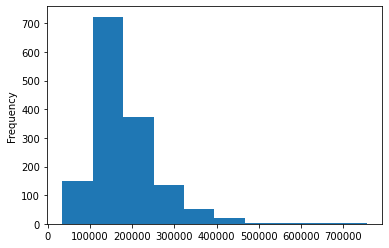

In [9]:
df["SalePrice"].plot(kind="hist")

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
missing = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
df = df.drop(['PoolQC', 'MiscFeature', 'Fence'], axis=1)
# we can replace categorical feature's nan value with labelencoder

In [13]:
cat_features = df.select_dtypes(exclude=['int', 'float']).columns
num_features = df.loc[:, df.columns != 'SalePrice'].select_dtypes(exclude=['object']).columns
df_cat = df[cat_features]
df_num = df[num_features]
df_saleprice = df[['SalePrice']]

In [14]:
df_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [16]:
missing = (df_cat.isnull().sum() / df_cat.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

Series([], dtype: float64)

In [17]:
missing = (df_num.isnull().sum() / df_num.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_num = mms.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=num_features)

In [19]:
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.997944,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.998629,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.999315,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns = df_num.columns)

In [21]:
missing = (df_num.isnull().sum() / df_num.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

Series([], dtype: float64)

In [22]:
df = pd.concat([df_cat, df_num, df_saleprice], axis=1)

In [23]:
df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,2,3,3,0,4,0,5,2,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,208500
1,3,1,2,3,3,0,2,0,24,1,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,181500
2,3,1,2,0,3,0,4,0,5,2,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,223500
3,3,1,2,0,3,0,0,0,6,2,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,140000
4,3,1,2,0,3,0,2,0,15,2,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,3,3,0,4,0,8,2,...,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,175000
1456,3,1,2,3,3,0,4,0,14,2,...,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,210000
1457,3,1,2,3,3,0,4,0,6,2,...,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,266500
1458,3,1,2,3,3,0,4,0,12,2,...,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,142125


In [24]:
q1 = df[num_features].quantile(0.05)
q3 = df[num_features].quantile(0.95)
intr_qr = q3 - q1
df = df[~((df[num_features] < (q1-1.5*intr_qr)) | (df[num_features] > (q3+1.5*intr_qr))).any(axis=1)]

In [25]:
df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,2,3,3,0,4,0,5,2,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,208500
1,3,1,2,3,3,0,2,0,24,1,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,181500
2,3,1,2,0,3,0,4,0,5,2,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,223500
3,3,1,2,0,3,0,0,0,6,2,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,140000
4,3,1,2,0,3,0,2,0,15,2,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,3,1,2,3,3,0,4,0,11,2,...,0.042007,0.102377,0.000000,0.0,0.0,0.0,0.0,0.545455,0.00,84500
1454,1,1,1,3,3,0,4,0,21,2,...,0.000000,0.206581,0.000000,0.0,0.0,0.0,0.0,0.818182,0.75,185000
1455,3,1,2,3,3,0,4,0,8,2,...,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0,0.636364,0.25,175000
1456,3,1,2,3,3,0,4,0,14,2,...,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,1.00,210000


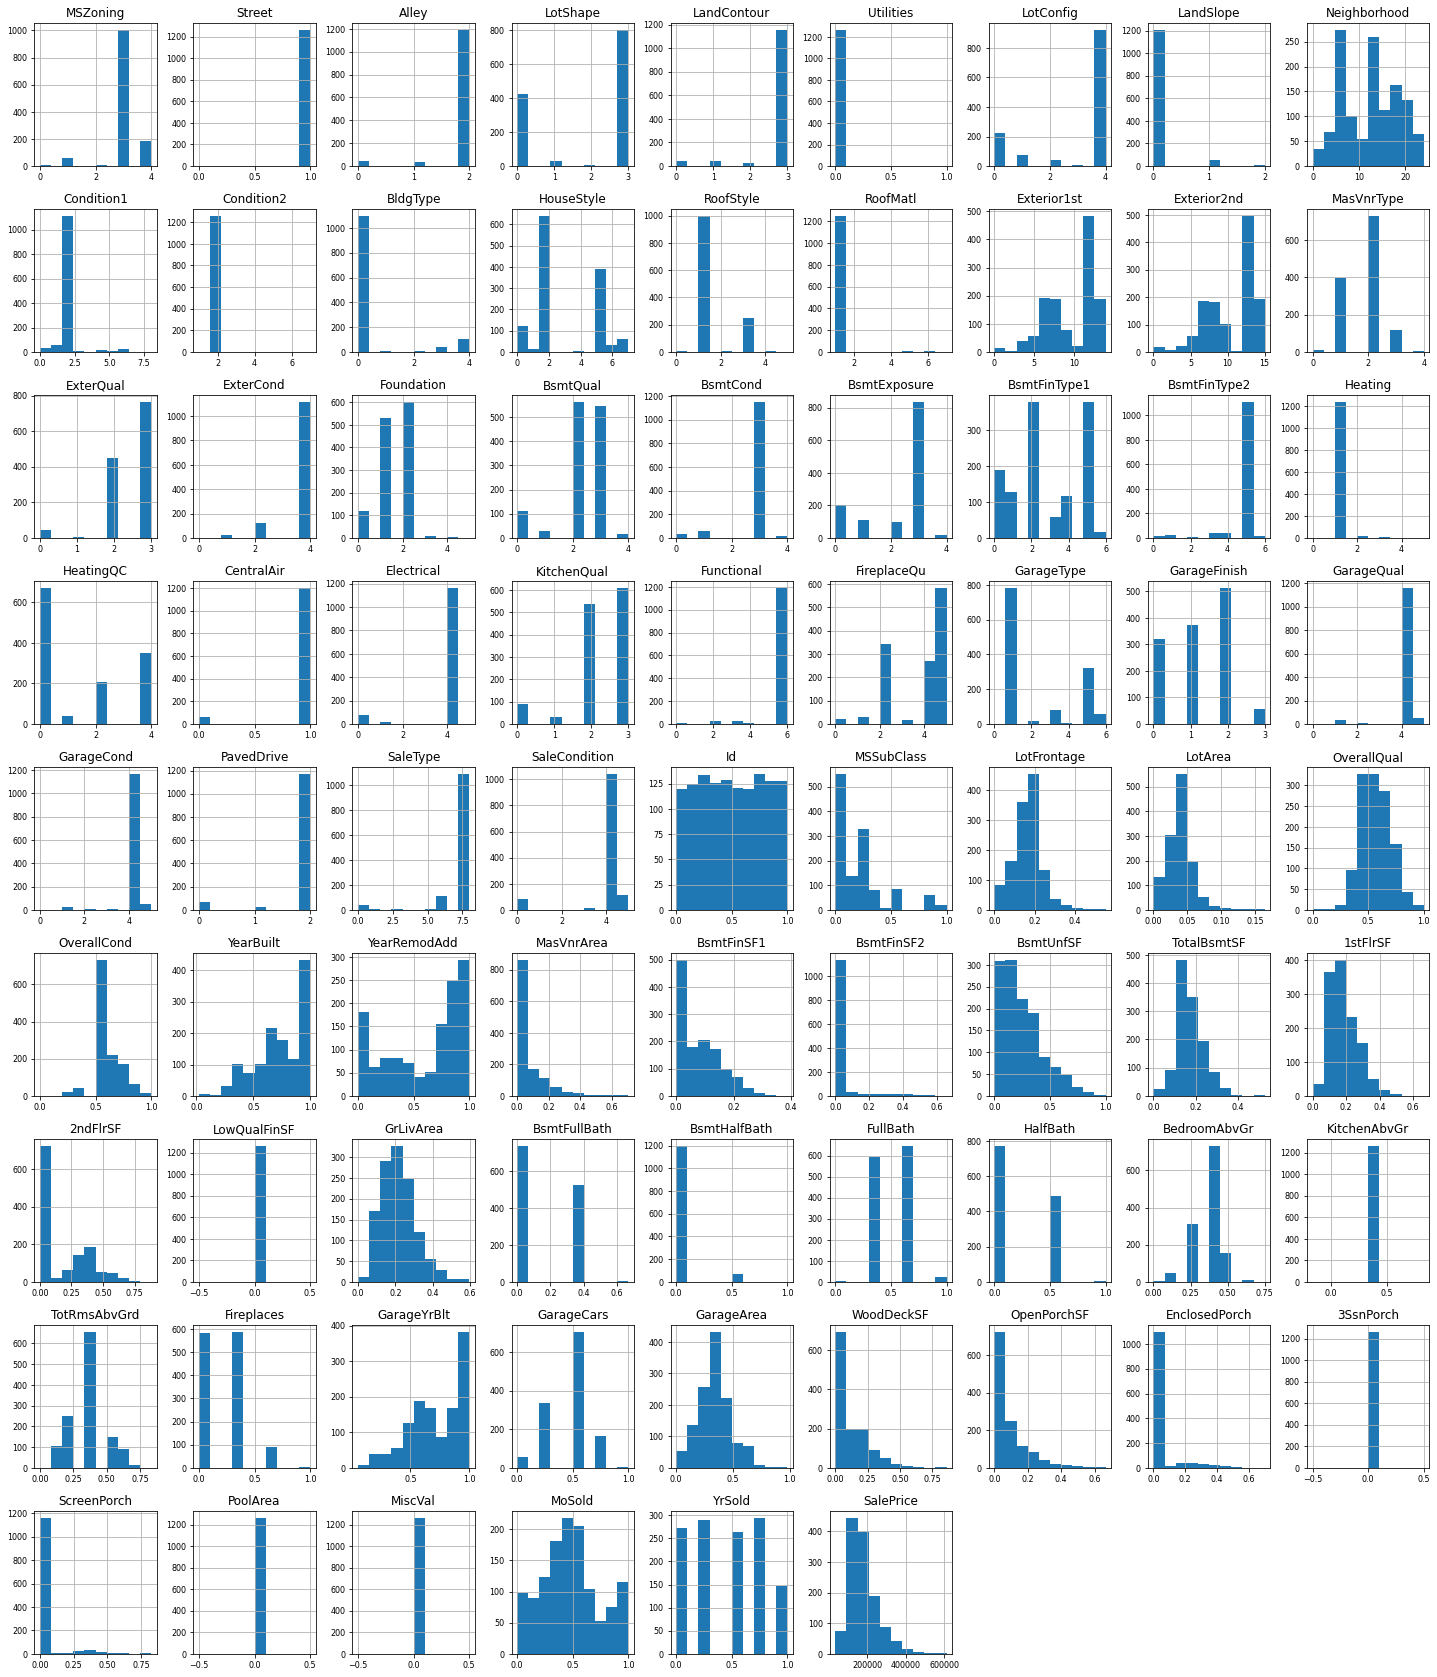

In [26]:
from matplotlib import pyplot as plt
df.hist(figsize=(25, 30), xlabelsize=8, ylabelsize=8)
plt.show()

3. train test dataset

In [27]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'SalePrice'].values
y = df[['SalePrice']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((886, 77), (380, 77), (886, 1), (380, 1))

Prepare model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [30]:
models = []
models.append(('LinR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('XGB', XGBRegressor()))

In [31]:
# K-fold Cross Validation
def model_performance(X, y, kf_model):
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    confusion_mat = np.zeros((2, 2))
    mse_list, mae_list, r2_list = 0, 0, 0
    for train_idx, test_idx in kfold.split(y):
        kf_X_train, kf_y_train = X[train_idx], y[train_idx]
        kf_X_test, kf_y_test = X[test_idx], y[test_idx]
        kf_model.fit(kf_X_train, kf_y_train)
        kf_y_pred = kf_model.predict(kf_X_test)
        mse_list += mse(kf_y_pred, kf_y_test)
        mae_list += mae(kf_y_pred, kf_y_test)
        r2_list += r2(kf_y_pred, kf_y_test)
    
    print("mse: ", mse_list/5)
    print("mae: ", mae_list/5)
    print("r2: ", r2_list/5)
    print()

In [32]:
for model_name, model in models:
    print(model_name)
    model_performance(X, y, model)

LogR
mse:  2959422033.2044754
mae:  0.21656801751452895
r2:  0.2485734633674032

LinR
mse:  3.419557085600811e+27
mae:  0.10346898311903481
r2:  0.7067042019740637

RF
mse:  638136139.081734
mae:  0.09116824473369095
r2:  0.8614635590456368

GB
mse:  529425062.86106575
mae:  0.0836459799612524
r2:  0.8956937723895381

DT
mse:  1252621759.5088887
mae:  0.14497841497835753
r2:  0.7760761115490179

XGB
mse:  624336230.7748992
mae:  0.09383612604278442
r2:  0.8787270687896367



Model fitting and selection

In [33]:
def best_model(model):
    print("Best Model Performance Score: ", model.best_score_)    
    print("Best Model Parameters: ", model.best_params_)
    
    
def AUC_scores(y, y_pred, y_prob):
    auc_score = roc_auc_score(y, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y, y_prob); 
    return (auc_score, fpr_df, tpr_df)

In [34]:
RF_PARAMETERS = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

RF_model = RandomForestRegressor()
RF_model_gs = GridSearchCV(RF_model, param_grid=RF_PARAMETERS, cv = 3, n_jobs = -1)
RF_model_gs.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]})

In [35]:
best_model(RF_model_gs)

Best Model Performance Score:  0.8367114362366701
Best Model Parameters:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [36]:
# Hyperparameter Tuning the Random Forest
GB_PARAMETERS = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 1.0],
    "n_estimators":[10]
}

GB_model = GradientBoostingRegressor()
GB_model_gs = GridSearchCV(GB_model, param_grid=GB_PARAMETERS, cv=3, n_jobs = -1)
GB_model_gs.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'], 'n_estimators': [10],
                         'subsample': [0.5, 1.0]})

In [37]:
best_model(GB_model_gs)

Best Model Performance Score:  0.7282330201082102
Best Model Parameters:  {'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.5}


In [38]:
XGB_PARAMETERS = { 'max_depth': [2, 4, 6],
           'n_estimators': [100, 200, 300],
           'colsample_bytree': [0.2, 0.8],
           'min_child_weight': [3, 5, 7],
           'gamma': [0.3, 0.5],
           'subsample': [0.4, 0.8]}

XGB_model = XGBRegressor()
XGB_model_gs = GridSearchCV(XGB_model, param_grid=XGB_PARAMETERS, cv = 3, n_jobs = -1)
XGB_model_gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [39]:
best_model(XGB_model_gs)

Best Model Performance Score:  0.8947159509698173
Best Model Parameters:  {'colsample_bytree': 0.2, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}


Guess House price of test dataset

In [40]:
model = XGBRegressor(colsample_bytree=0.2, gamma=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=0.8)

In [41]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
valid

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [43]:
tmp = valid

In [44]:
valid_id = valid[['Id']]
valid = valid.drop(['PoolQC', 'MiscFeature', 'Fence'], axis=1)
cat_features = valid.select_dtypes(exclude=['int', 'float']).columns
num_features = valid.select_dtypes(exclude=['object']).columns
valid_cat = valid[cat_features]
valid_num = valid[num_features]
valid_cat = valid_cat.apply(le.fit_transform)
valid_num = mms.transform(valid_num)
valid_num = pd.DataFrame(valid_num, columns=num_features)
valid_num = pd.DataFrame(imputer.fit_transform(valid_num),columns = valid_num.columns)
valid = pd.concat([valid_cat, valid_num], axis=1)

In [45]:
res = model.predict(valid)

In [46]:
res

array([112163.65, 160369.25, 180538.42, ..., 173306.  , 120370.4 ,
       241734.44], dtype=float32)

In [47]:
valid_id['SalePrice'] = res

In [48]:
valid_id

,Id,SalePrice
0,1461,112163.648438
1,1462,160369.250000
2,1463,180538.421875
3,1464,191748.203125
4,1465,216737.984375
...,...,...
1454,2915,80446.835938
1455,2916,83565.195312
1456,2917,173306.000000
1457,2918,120370.398438


In [49]:
valid_id.to_csv('submission.csv', index=False)